# Problem Statement : <br>
- The company is looking at prospective properties to buy to enter the market.
- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- The company wants to know the following things about the prospective properties:
    - Which variables are significant in predicting the price of a house, and
    - How well those variables describe the price of a house.

## 1. Reading and Understanding the data

In [147]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import os

%matplotlib inline 

In [2]:
# hide warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset
df_house = pd.read_csv('train.csv')

In [4]:
# number of rows and columns in the dataset
df_house.shape

(1460, 81)

**Observation** : <br>
- 1460 rows and 80 columns

In [5]:
# checking the dataset
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Summary of columns
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Summary of Numerical columns
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Data Cleaning

In [8]:
pd.set_option('max_rows',None)

In [9]:
# Checking Null Values in dataset
df_house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
# Checking percentage of Null Values
((df_house.isnull().sum()/len(df_house))*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

**Observation:** <br>
- There are few columns like PoolQC , MiscFeature , Alley, Fence and FireplaceQu have more than 30% missing values


In [11]:
# Making list of column with categorical variable
housing_cat = list(df_house.select_dtypes(include='object'))
housing_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Dropping / Imputing missing values 

In [12]:
# checking column Alley
df_house['Alley'].value_counts(dropna = False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

**Observation:** <br>
- For Alley NaN is 'No alley access' so replacing Nan with 'No alley access'

In [13]:
# imputing values and checking percentage of value
df_house['Alley'].replace({np.nan:'No alley access'},inplace=True)
100*(df_house['Alley'].value_counts()/df_house['Alley'].count())

No alley access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64

In [14]:
# checking column PoolQC
df_house['PoolQC'].value_counts(dropna = False)

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

**Observation:** <br>
- For PoolQC NaN is 'No Pool' so replacing Nan with 'No Pool'

In [15]:
# imputing values and checking percentage of value
df_house['PoolQC'].replace({np.nan:'No Pool'},inplace=True)
100*(df_house['PoolQC'].value_counts()/df_house['PoolQC'].count())

No Pool    99.520548
Gd          0.205479
Fa          0.136986
Ex          0.136986
Name: PoolQC, dtype: float64

In [16]:
# checking column MiscFeature
df_house['MiscFeature'].value_counts(dropna = False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

**Observation:** <br>
- For MiscFeature NaN is 'None' so replacing Nan with 'None'

In [17]:
# imputing values and checking percentage of value
df_house['MiscFeature'].replace({np.nan:'None'},inplace=True)
100*(df_house['MiscFeature'].value_counts()/df_house['MiscFeature'].count())

None    96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64

In [18]:
# checking column Fence
df_house['Fence'].value_counts(dropna = False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

**Observation:** <br>
- For Fence NaN is 'No fence' so replacing Nan with 'No Fence'

In [19]:
# imputing values and checking percentage of value
df_house['Fence'].replace({np.nan:'None'},inplace=True)
100*(df_house['Fence'].value_counts()/df_house['Fence'].count())

None     80.753425
MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64

In [20]:
# Checking percentage of Null values of remaining columns 
((df_house.isnull().sum()/len(df_house))*100).sort_values(ascending=False)

FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
LandContour       0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
Foundation        0.000000
ExterQual         0.000000
ExterCond         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
BsmtFinSF1        0.000000
RoofStyle         0.000000
YearBuilt         0.000000
Utilities         0.000000
Alley             0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
LotShape          0.000000
BldgType          0.000000
OverallCond       0.000000
H

In [21]:
# checking column FireplaceQu
df_house['FireplaceQu'].value_counts(dropna = False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

**Observation:** <br>
- For  FireplaceQu NaN is 'No Fireplace' so replacing Nan with 'No Fireplace'

In [22]:
# # imputing values and checking percentage of value
df_house['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)
100*(df_house['FireplaceQu'].value_counts()/df_house['FireplaceQu'].count())

No Fireplace    47.260274
Gd              26.027397
TA              21.438356
Fa               2.260274
Ex               1.643836
Po               1.369863
Name: FireplaceQu, dtype: float64

In [23]:
# checking column LotFrontage
df_house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

**Observation:** <br>
- For LotFrontage we can observe that mean and median are very close to each other so imputing meadin for missing values.

In [24]:
# imputing values and checking percentage of value
df_house['LotFrontage'].fillna(df_house['LotFrontage'].median(),inplace=True)
df_house['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [25]:
((df_house.isnull().sum()/len(df_house))*100).sort_values(ascending=False)

GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Alley            0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterCond        0.000000
ExterQual        0.000000
LotShape         0.000000
Foundation       0.000000
MSSubClass       0.000000
BsmtFinSF1       0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
OverallCond      0.000000
Condition2       0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Street           0.000000
OverallQual      0.000000
LotArea          0.000000
BldgType         0.000000
HouseStyle  

In [26]:
# For columns GarageType , GarageFinish , GarageCond , GarageQual imputing NaN with 'No Garage'
df_house['GarageType'].replace({np.nan:'No Garage'},inplace=True)
df_house['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)
df_house['GarageCond'].replace({np.nan:'No Garage'},inplace=True)
df_house['GarageQual'].replace({np.nan:'No Garage'},inplace=True)

In [27]:
# checking values for the columns  
print(100*(df_house['GarageType'].value_counts()/df_house['GarageType'].count()))
print("----------------------------------")
print(100*(df_house['GarageFinish'].value_counts()/df_house['GarageFinish'].count()))
print("----------------------------------")
print(100*(df_house['GarageCond'].value_counts()/df_house['GarageCond'].count()))
print("----------------------------------")
print(100*(df_house['GarageQual'].value_counts()/df_house['GarageQual'].count()))

Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64
----------------------------------
Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64
----------------------------------
TA           90.821918
No Garage     5.547945
Fa            2.397260
Gd            0.616438
Po            0.479452
Ex            0.136986
Name: GarageCond, dtype: float64
----------------------------------
TA           89.794521
No Garage     5.547945
Fa            3.287671
Gd            0.958904
Ex            0.205479
Po            0.205479
Name: GarageQual, dtype: float64


In [28]:
df_house.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
SalePrice         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
Foundation        0
ExterQual         0
ExterCond         0
BsmtFinSF1        0
BsmtFinSF2        0
YearRemodAdd      0
YearBuilt         0
TotalBsmtSF       0
OverallCond       0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
BsmtUnfSF         0
HeatingQC         0
Heating           0
ScreenPorch       0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0


In [29]:
# For columns BsmtFinType2 , BsmtExposure , BsmtQual , BsmtFinType1  ,BsmtCond imputing NaN with 'No Basement'
df_house['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)
df_house['BsmtFinType2'].replace({np.nan:'No Basement'},inplace=True)
df_house['BsmtExposure'].replace({np.nan:'No Basement'},inplace=True)
df_house['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)
df_house['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)

In [30]:
# checking values for the columns  
print(100*(df_house['BsmtFinType1'].value_counts()/df_house['BsmtFinType1'].count()))
print("----------------------------------")
print(100*(df_house['BsmtFinType2'].value_counts()/df_house['BsmtFinType2'].count()))
print("----------------------------------")
print(100*(df_house['BsmtExposure'].value_counts()/df_house['BsmtExposure'].count()))
print("----------------------------------")
print(100*(df_house['BsmtCond'].value_counts()/df_house['BsmtCond'].count()))

Unf            29.452055
GLQ            28.630137
ALQ            15.068493
BLQ            10.136986
Rec             9.109589
LwQ             5.068493
No Basement     2.534247
Name: BsmtFinType1, dtype: float64
----------------------------------
Unf            86.027397
Rec             3.698630
LwQ             3.150685
No Basement     2.602740
BLQ             2.260274
ALQ             1.301370
GLQ             0.958904
Name: BsmtFinType2, dtype: float64
----------------------------------
No             65.273973
Av             15.136986
Gd              9.178082
Mn              7.808219
No Basement     2.602740
Name: BsmtExposure, dtype: float64
----------------------------------
TA             89.794521
Gd              4.452055
Fa              3.082192
No Basement     2.534247
Po              0.136986
Name: BsmtCond, dtype: float64


In [31]:
df_house.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
MasVnrType        8
MasVnrArea        8
Electrical        1
SalePrice         0
ExterCond         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
YearRemodAdd      0
YearBuilt         0
TotalBsmtSF       0
OverallCond       0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
BsmtUnfSF         0
HeatingQC         0
Heating           0
ScreenPorch       0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0


In [32]:
# checking column MasVnrType
df_house['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [33]:
# imputing mode for this categorical column
df_house['MasVnrType'].replace({np.nan:'None'},inplace=True)

In [34]:
df_house['MasVnrType'].value_counts(dropna=False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [35]:
# checking column MasVnrArea
df_house['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [36]:
# As mean and median are not close imputing the null values with median for MasVnrArea 
df_house['MasVnrArea'] = df_house['MasVnrArea'].replace(np.nan, df_house['MasVnrArea'].median())

In [37]:
# checking column GarageYrBlt
df_house['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [38]:
# Imputing the null values with mode for GarageYrBlt
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].replace(np.nan,'2005')

In [39]:
df_house.isnull().sum().sort_values(ascending=False)

Electrical       1
SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
OverallCond      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
ScreenPorch      0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
PoolArea         0
GarageCars  

In [40]:
# As there is only one missing value we will  impute it with the mode. 
print(df_house['Electrical'].value_counts(dropna=False))
df_house['Electrical'] = df_house['Electrical'].replace(np.nan,'SBrkr')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64


In [41]:
df_house.isnull().sum().sort_values(ascending=False)

SalePrice        0
Heating          0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
Utilities        0
OverallQual      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
CentralAir       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

**Observation:**
- There are no missing values in the dataset 

### Checking Outliers and Outliers treatment 

In [42]:
# making list of all numeric columns
housing_Num = list(set(df_house.columns) - set(housing_cat))

# removing GarageYrBlt as it is a year column
housing_Num.remove('GarageYrBlt')

In [43]:
# box plots for checking Outliers
def plot_box(col):
    plt.figure(figsize = (6,6))
    plt.title(col)
    sns.boxplot(data = df_house,x = col)
    plt.show()
    return

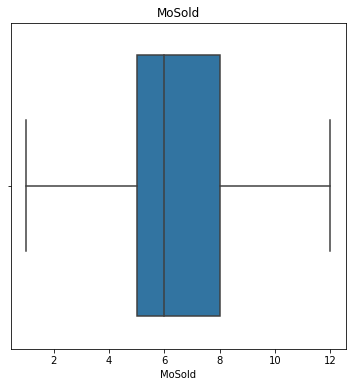

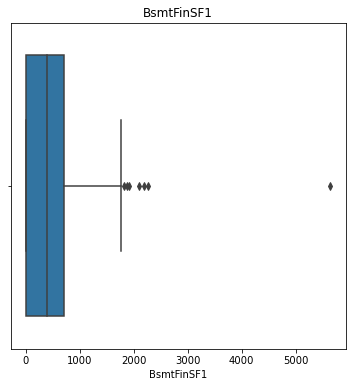

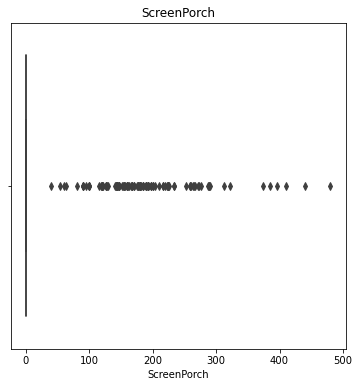

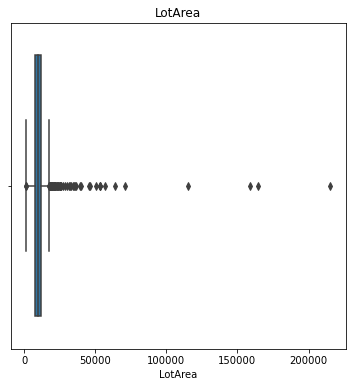

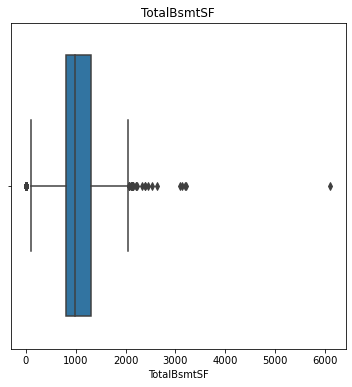

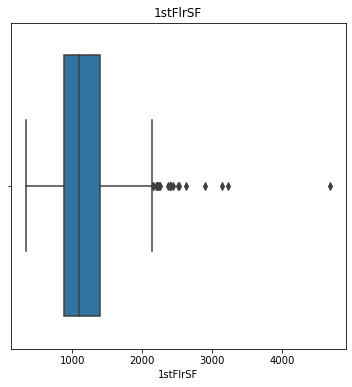

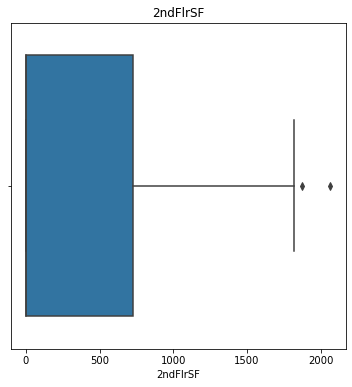

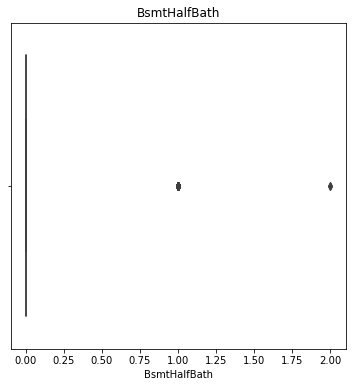

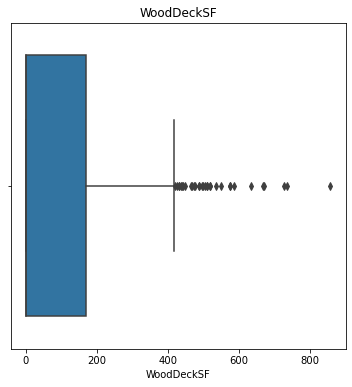

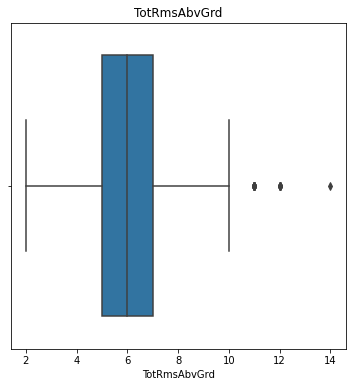

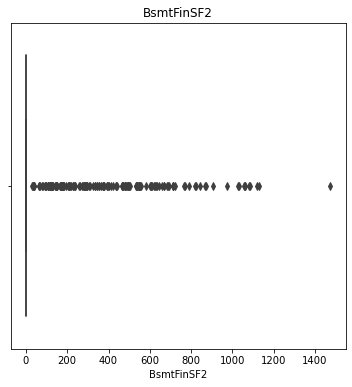

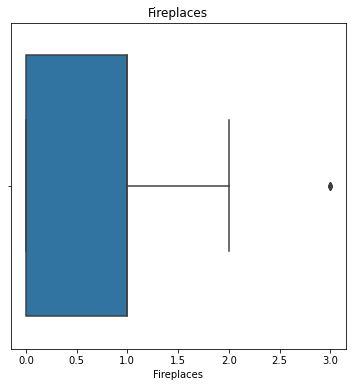

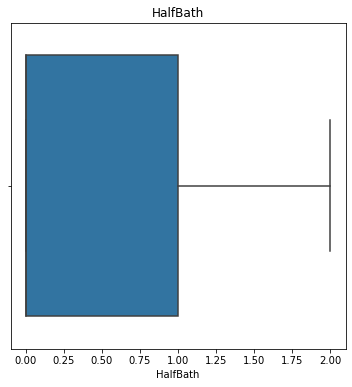

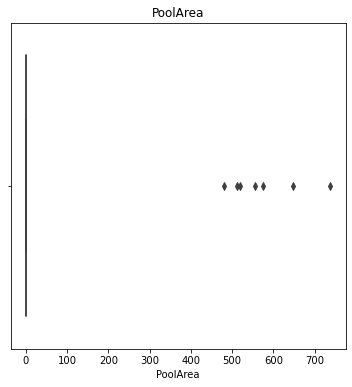

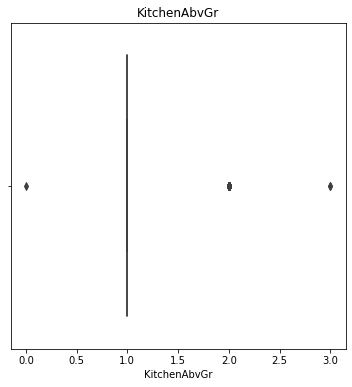

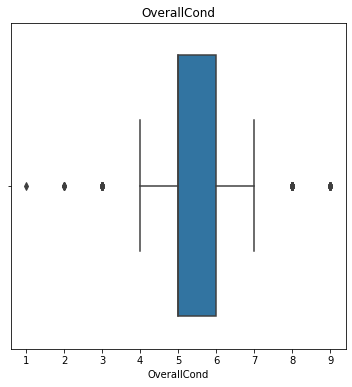

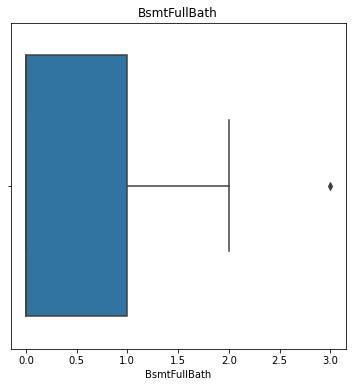

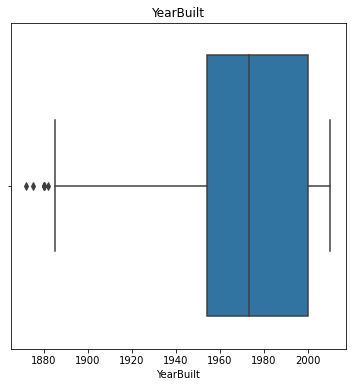

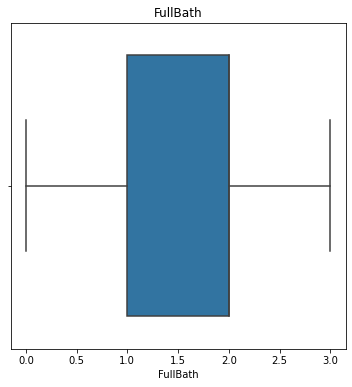

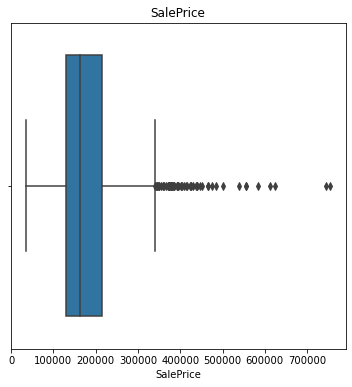

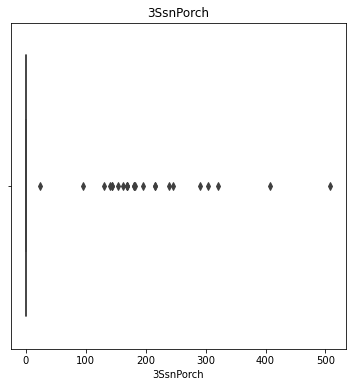

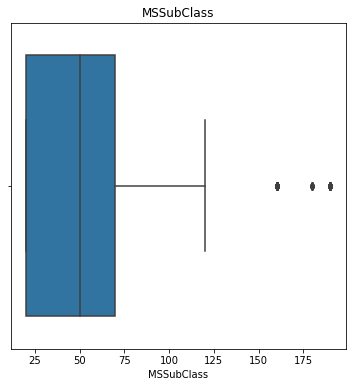

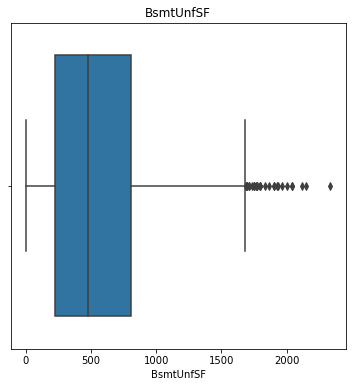

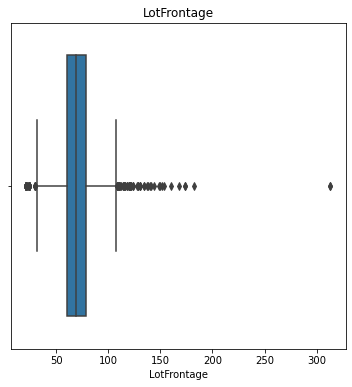

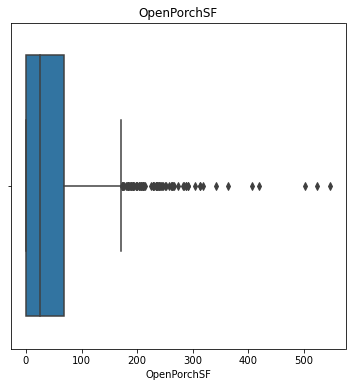

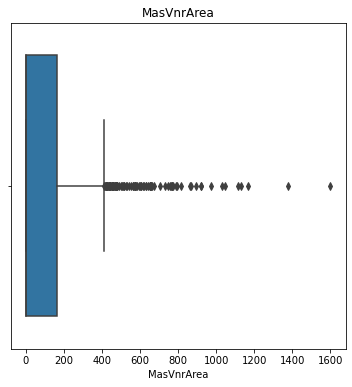

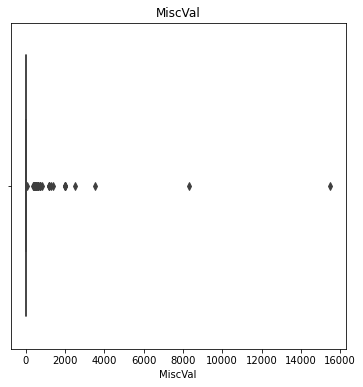

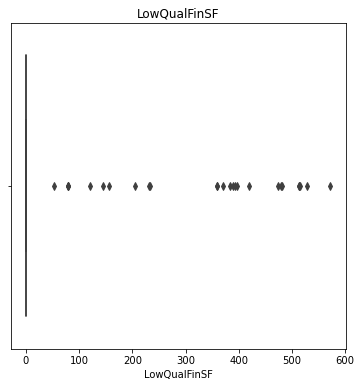

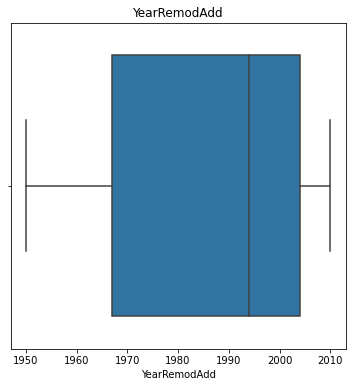

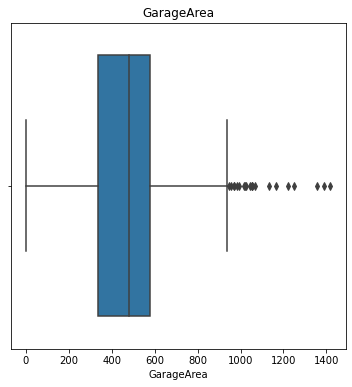

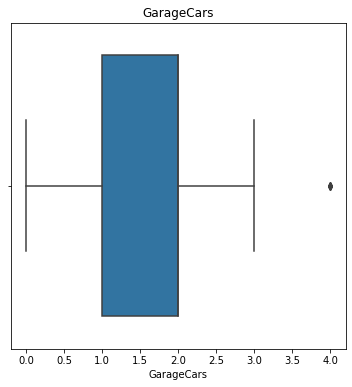

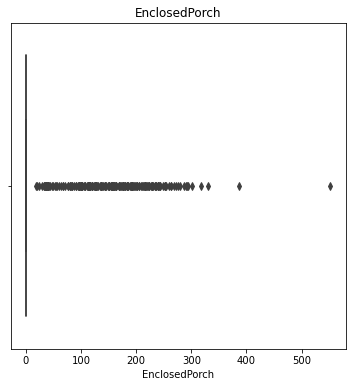

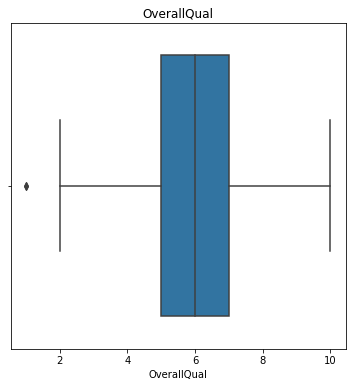

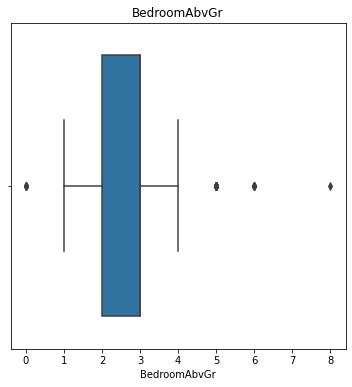

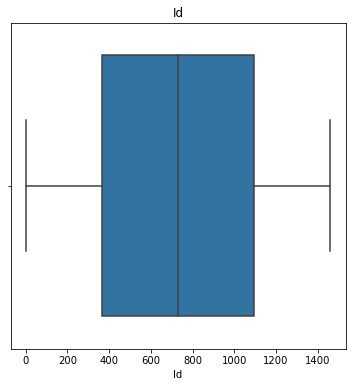

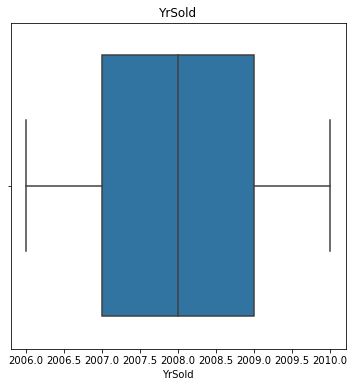

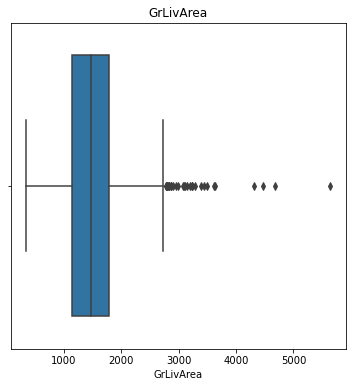

In [44]:
# plotting box plot for all numeric columns
for col in housing_Num:
    plot_box(col)

**Observation:** <br>
- We can observe outliers in some columns.

In [45]:
# Treating some outliers by removing outliers above 99 percentile

# LotArea

nn_quartile_LotArea = df_house['LotArea'].quantile(0.99)
df_house =df_house[df_house["LotArea"] < nn_quartile_LotArea]

# MasVnrArea

nn_quartile_MasVnrArea = df_house['MasVnrArea'].quantile(0.99)
df_house = df_house[df_house["MasVnrArea"] < nn_quartile_MasVnrArea]

# TotalBsmtSF

nn_quartile_TotalBsmtSF = df_house['TotalBsmtSF'].quantile(0.99)
df_house = df_house[df_house["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# WoodDeckSF

nn_quartile_WoodDeckSF = df_house['WoodDeckSF'].quantile(0.99)
df_house = df_house[df_house["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# OpenPorchSF

nn_quartile_OpenPorchSF = df_house['OpenPorchSF'].quantile(0.99)
df_house = df_house[df_house["OpenPorchSF"] < nn_quartile_OpenPorchSF]

## 3. Univarite and Bivariate Analysis 

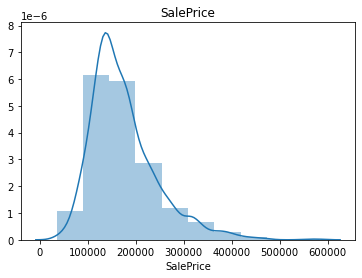

In [46]:
# Visualising the target variable SalePrice

plt.title('SalePrice')
sns.distplot(df_house['SalePrice'], bins=10)
plt.show()

**Obsevation:** <br>
- we can observe that our target variable SalePrice is right skewed.

In [47]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,None,None,0,12,2008,WD,Normal,250000


In [48]:
df_house.isnull().sum().sort_values(ascending=False)

SalePrice        0
Heating          0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
Utilities        0
OverallQual      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
CentralAir       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

### Univariate Ananlysis of categorical columns

In [49]:
# count plots for checking data distribution
def plot_count(col):
    plt.figure(figsize=(6,6))
    plt.title(col)
    plt.xticks(rotation=90)
    sns.countplot(data = df_house , x = col)
    plt.show()
    return

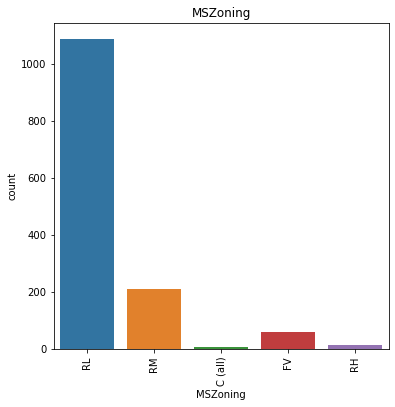

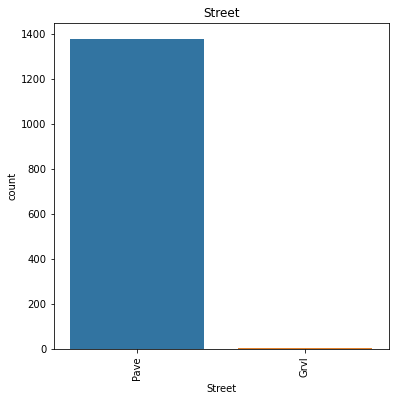

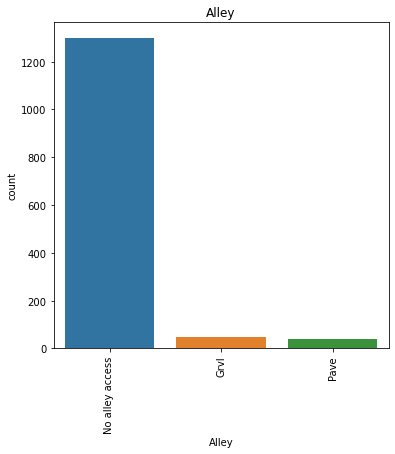

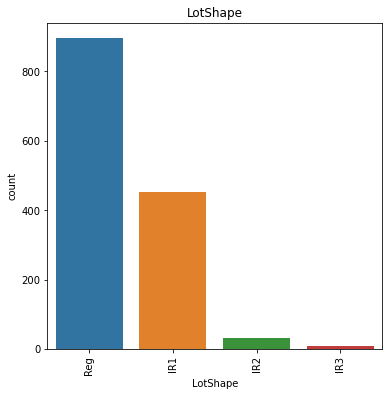

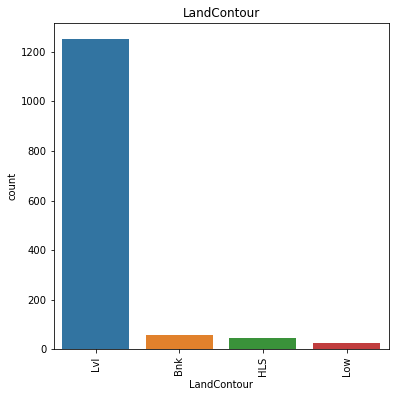

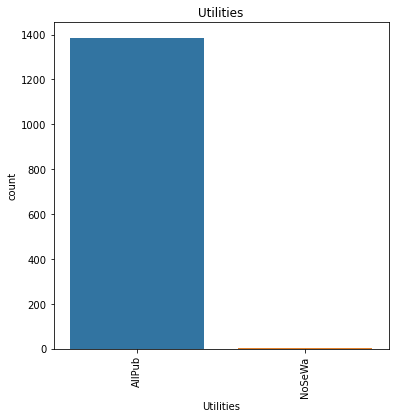

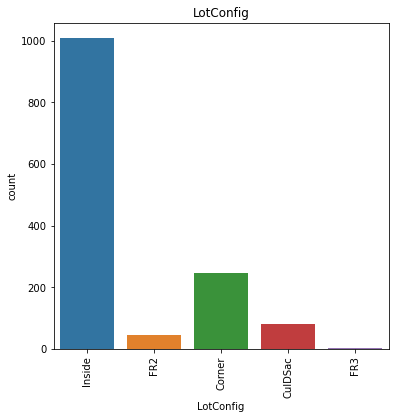

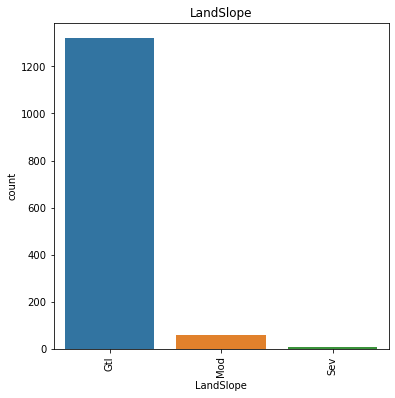

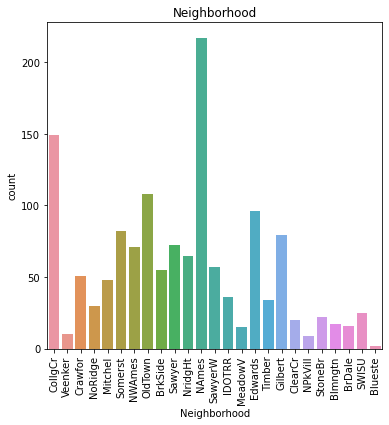

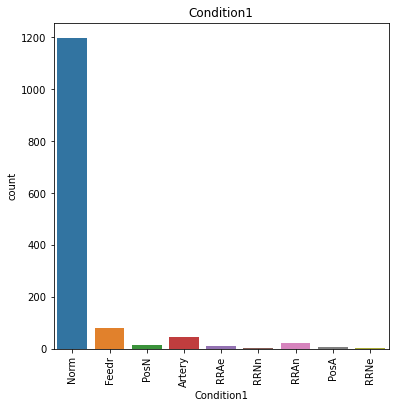

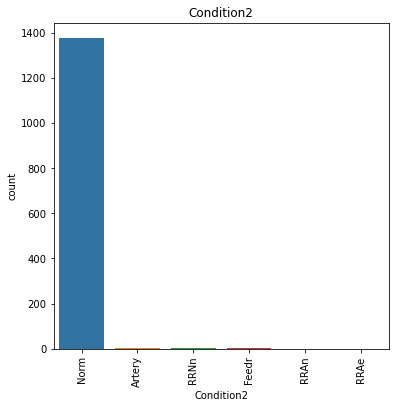

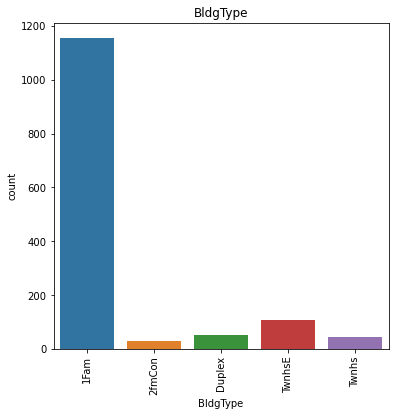

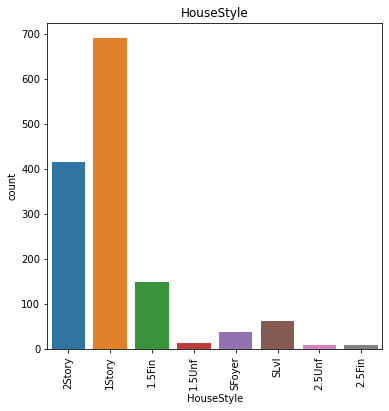

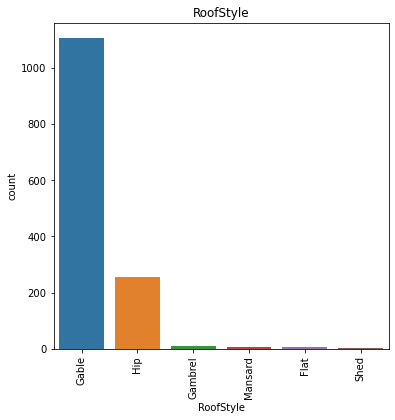

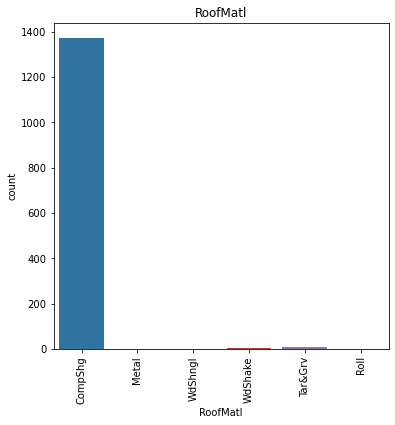

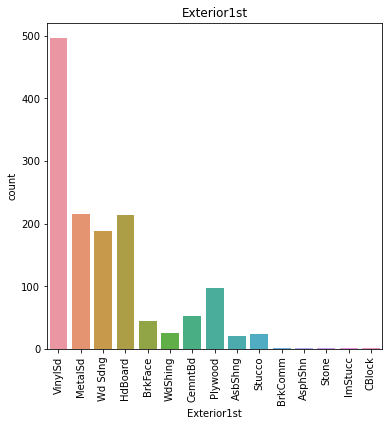

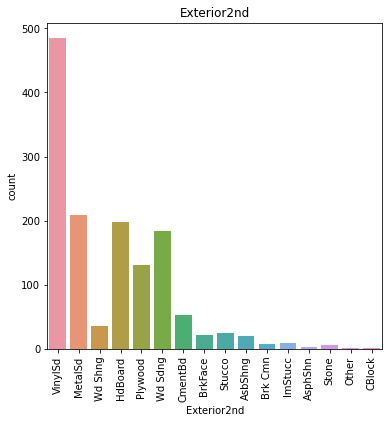

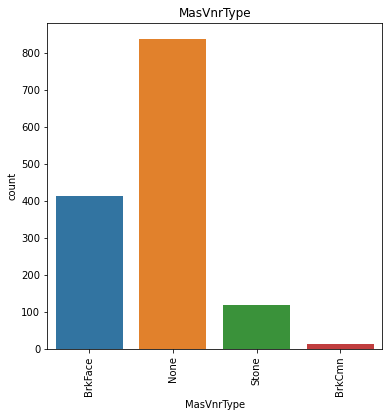

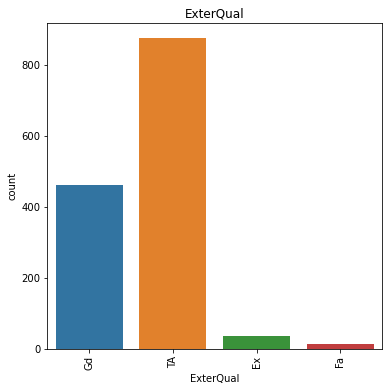

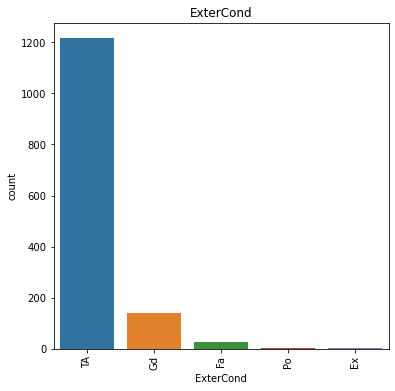

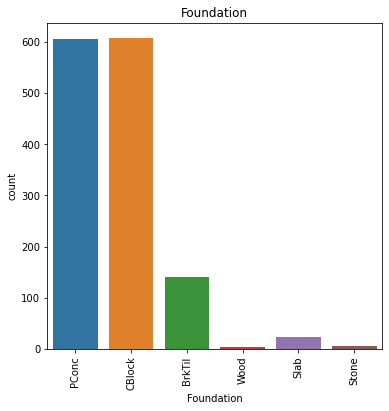

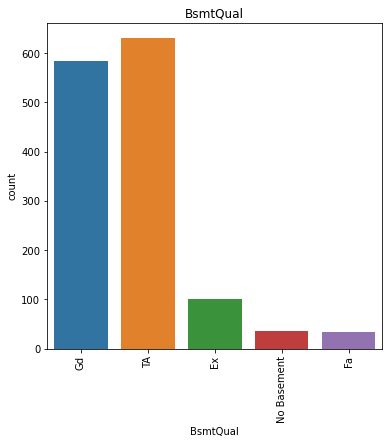

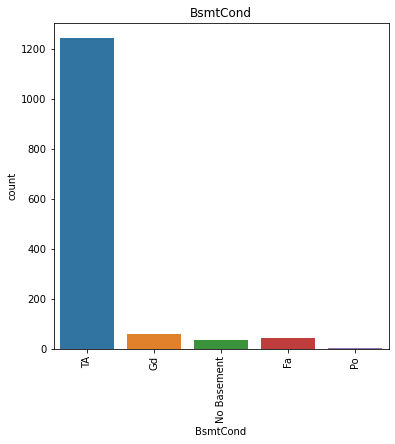

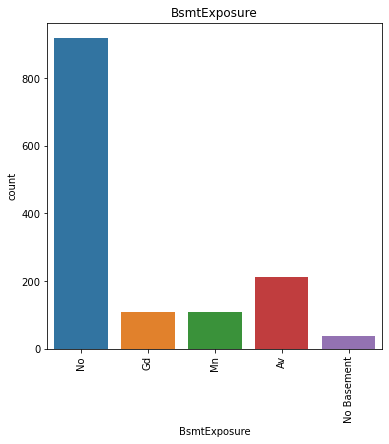

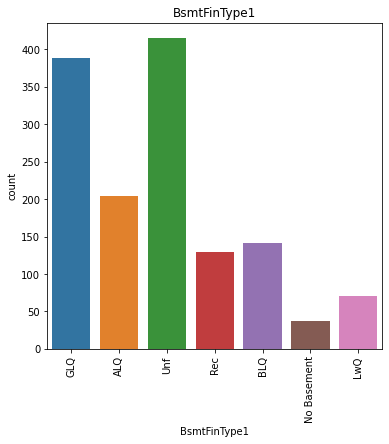

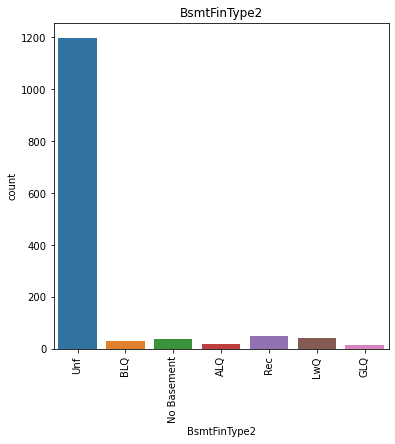

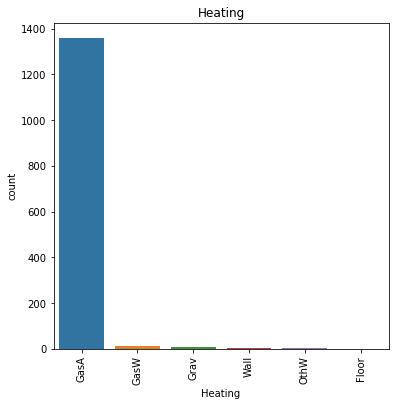

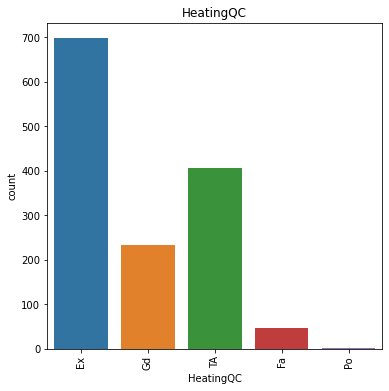

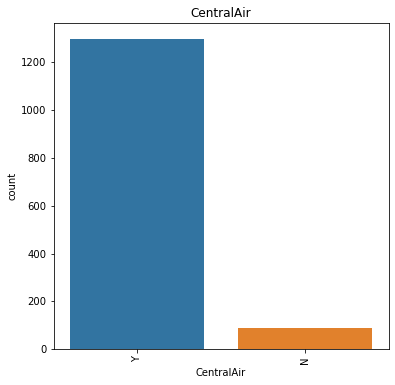

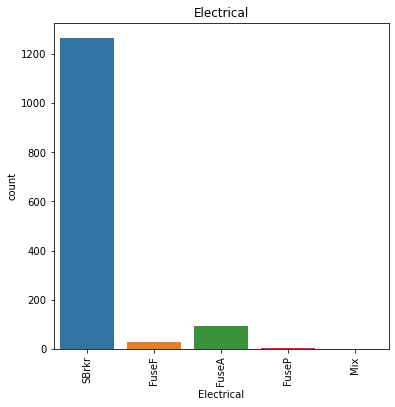

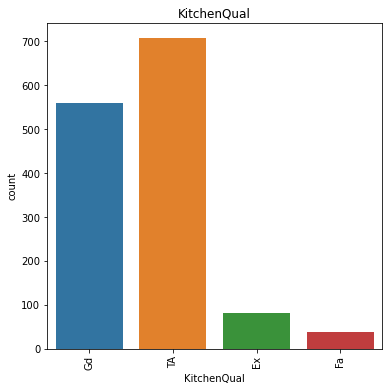

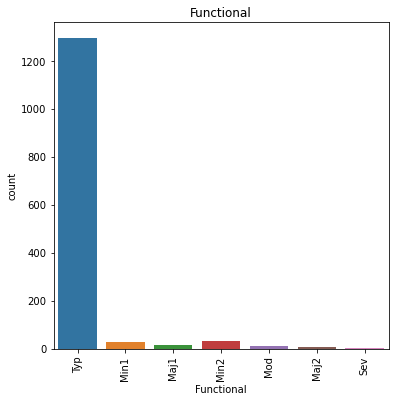

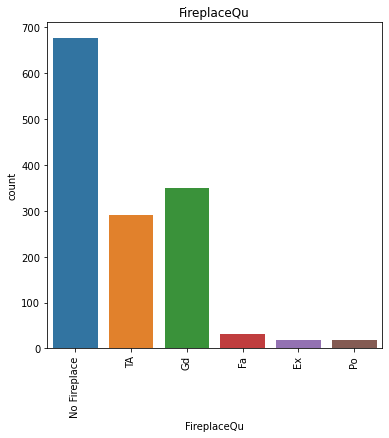

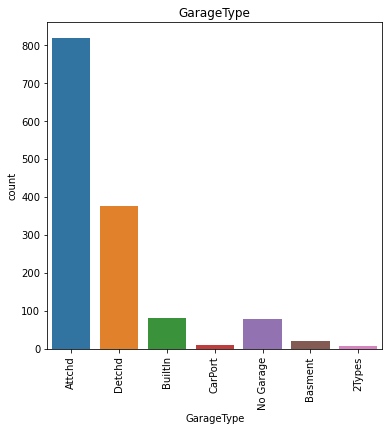

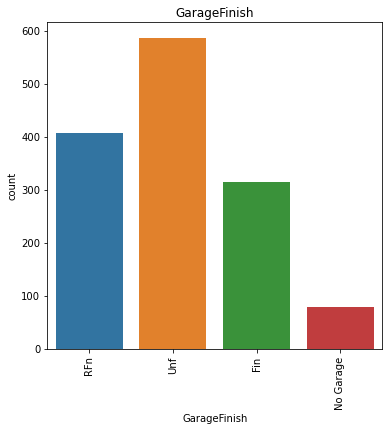

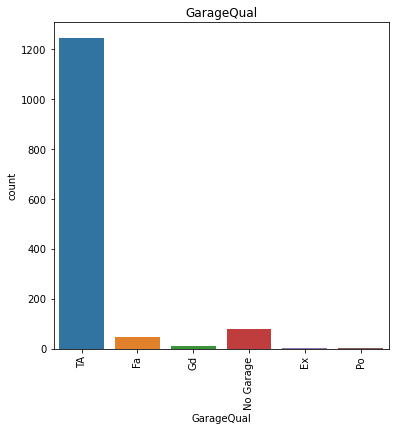

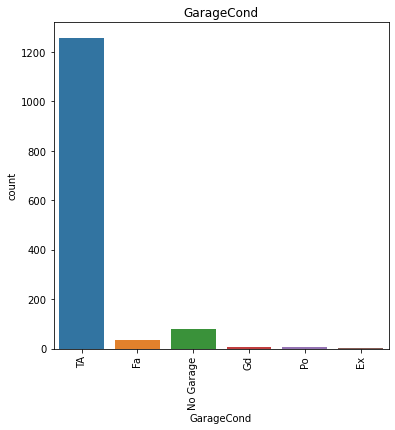

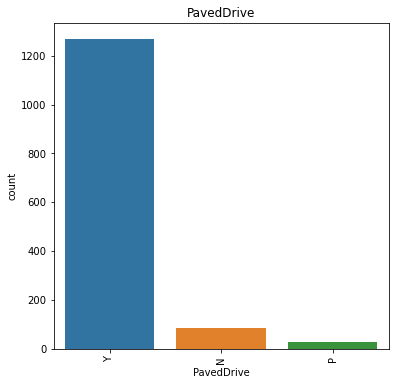

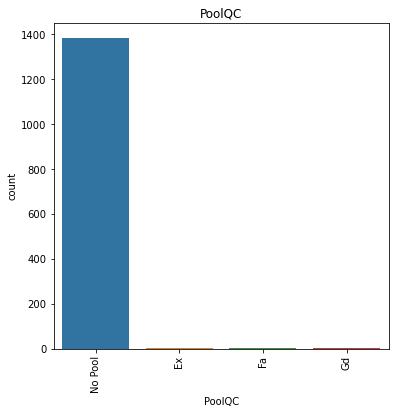

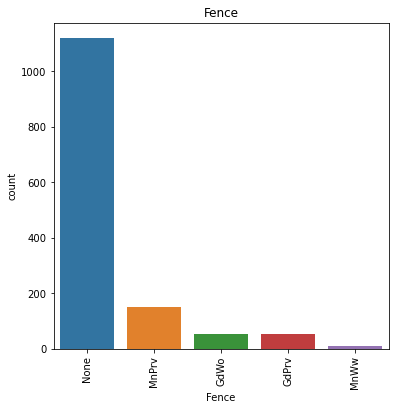

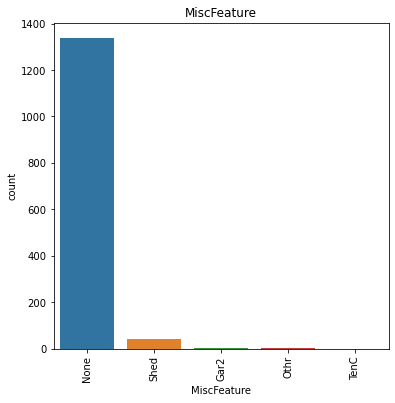

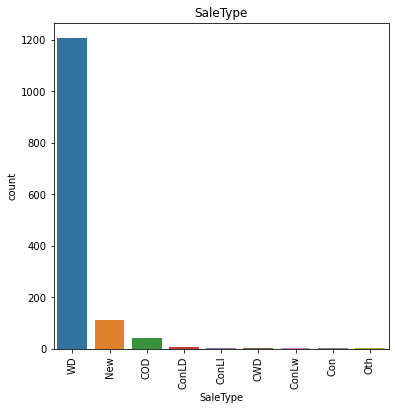

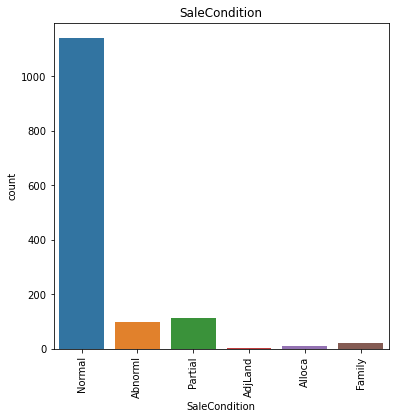

In [50]:
# plotting box plot for all categorical columns
for col in housing_cat:
    plot_count(col)

**Obsevation:** <br>
- we can observe data imbalance in some of the columns.

In [51]:
df_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Bivariate Analysis

In [52]:
df_house.isnull().sum().sort_values(ascending=False)

SalePrice        0
Heating          0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
Utilities        0
OverallQual      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
CentralAir       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

<Figure size 720x360 with 0 Axes>

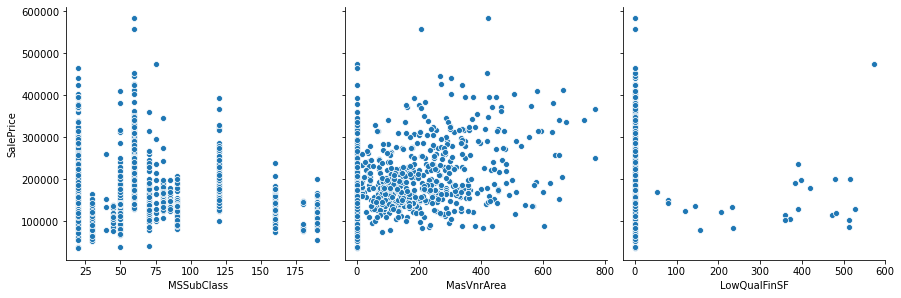

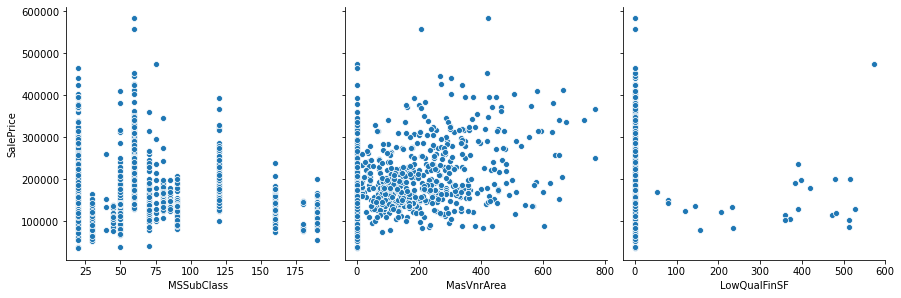

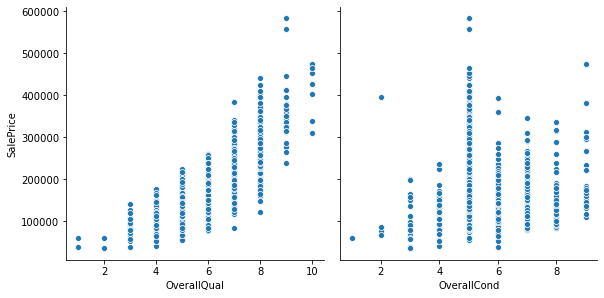

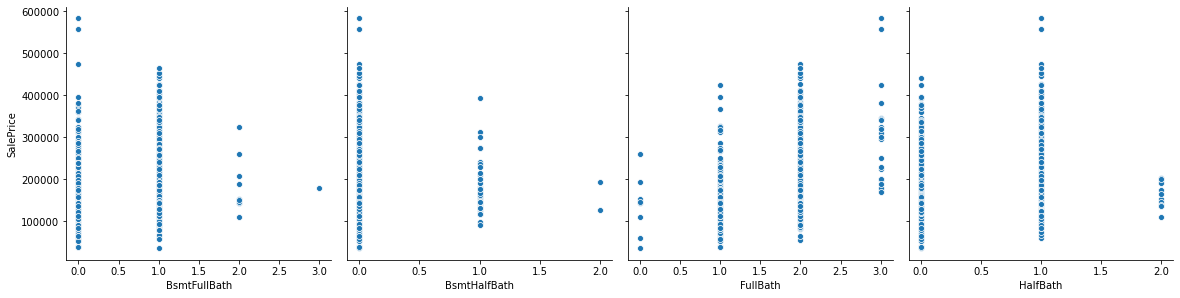

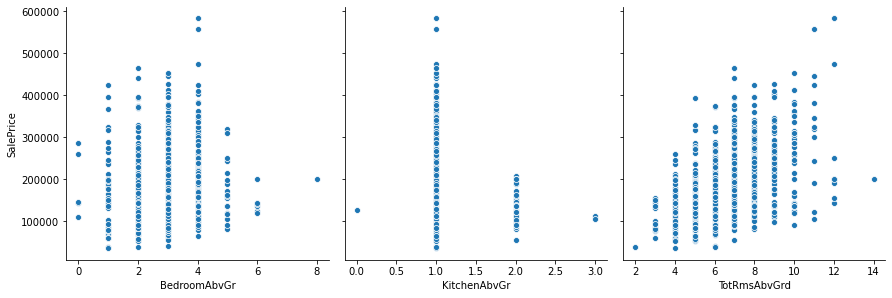

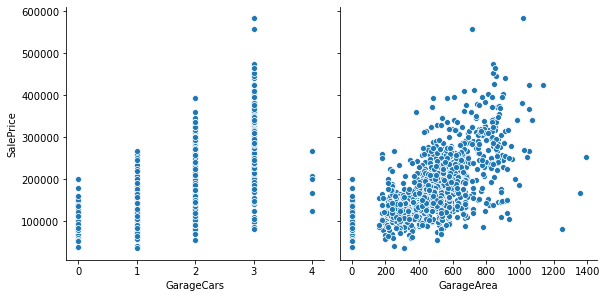

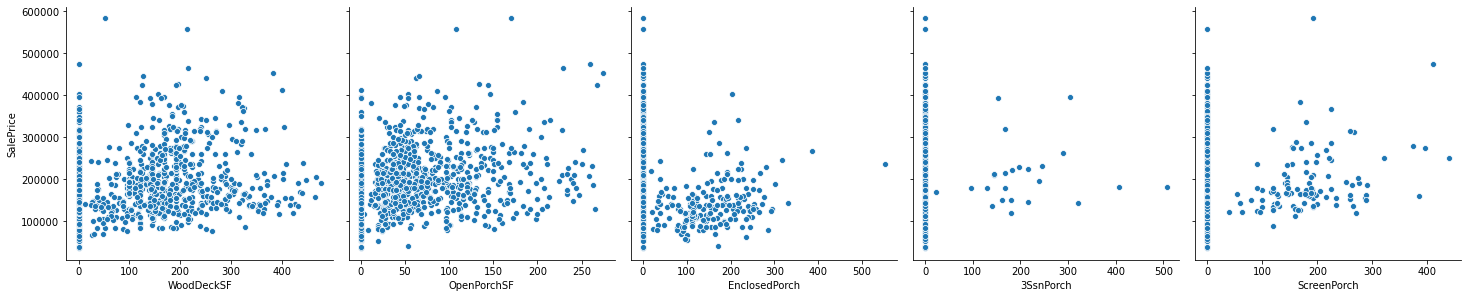

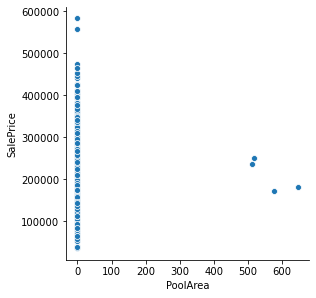

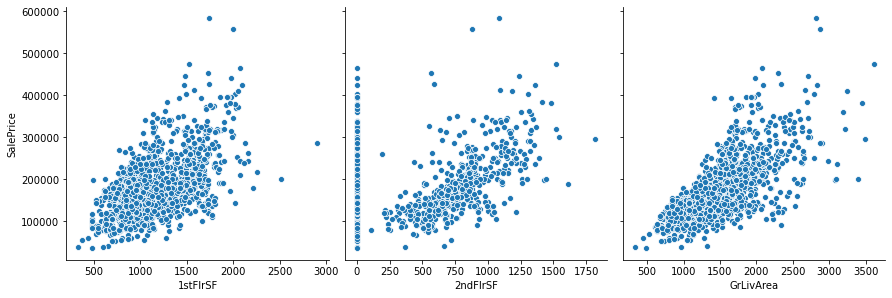

In [53]:
# pairplots for numeric variables
plt.figure(figsize=(10,5))
sns.pairplot(df_house, x_vars=['MSSubClass','MasVnrArea','LowQualFinSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['MSSubClass','MasVnrArea','LowQualFinSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['OverallQual', 'OverallCond'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['GarageCars','GarageArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

sns.pairplot(df_house, x_vars=['PoolArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

plt.show()


### Multivariate Analysis

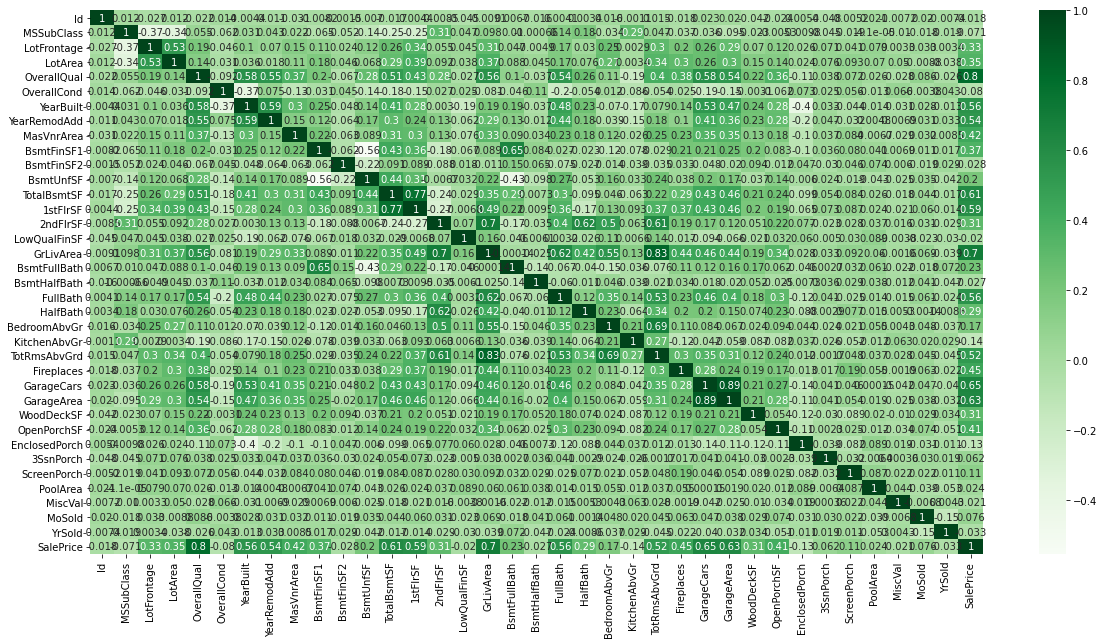

In [54]:
# plotting heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(df_house.corr(), annot = True, cmap="Greens")
plt.show()

## 4. Data Preparation

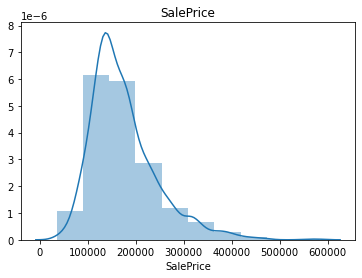

In [55]:
# plotting the target variable to check it's distribution  
plt.title('SalePrice')
sns.distplot(df_house['SalePrice'], bins=10)
plt.show()

**Observation:** <br>
- We can observe that the target variable SalePrice is right skewed. 

In [56]:
# checking skewness
df_house['SalePrice'].skew()

1.3397280437452983

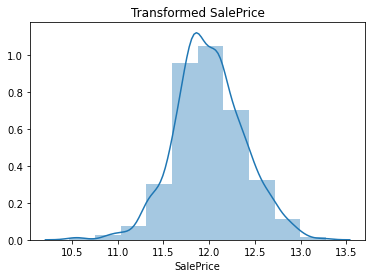

In [57]:
# log transformation of SalePrice to log for removing skewness and better visualisation of data 
df_house['SalePrice'] = np.log(df_house['SalePrice'])
plt.title('Transformed SalePrice')
sns.distplot(df_house['SalePrice'], bins=10)
plt.show()

**Obsevation:** <br>
- we can observe that our target variable SalePrice is normally distributed after log transformation.

In [58]:
df_house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [59]:
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].astype(int)

In [60]:
# deriving new column which would indicate if the Garage was built before 2000 or after 2000.

def GarageYear(x):
    if x == 0:
        return 0
    elif x >= 1900 and x < 2000:        
        return 0
    else:   
        return 1
    
df_house['GarageYrBlt_2000'] = df_house['GarageYrBlt'].apply(GarageYear)
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_2000
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,No Pool,None,None,0,2,2008,WD,Normal,12.247694,1
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,No Pool,None,None,0,5,2007,WD,Normal,12.109011,0
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,No Pool,None,None,0,9,2008,WD,Normal,12.317167,1
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,No Pool,None,None,0,2,2006,WD,Abnorml,11.849398,0
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,No Pool,None,None,0,12,2008,WD,Normal,12.429216,1


In [61]:
# dropping GarageYrBlt
df_house = df_house.drop(['GarageYrBlt'],axis=1)

In [62]:
df_house.isnull().sum().sort_values(ascending=False)

GarageYrBlt_2000    0
Heating             0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
LandContour         0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
Utilities           0
OverallQual         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
TotalBsmtSF         0
HeatingQC           0
SalePrice           0
CentralAir          0
GarageQual          0
GarageCond          0
PavedDrive

In [63]:
df_house['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [64]:
df_house['BsmtCond'].unique()

array(['TA', 'Gd', 'No Basement', 'Fa', 'Po'], dtype=object)

In [65]:
# Mapping ordinal data of the columns into ordered values

df_house['LotShape'] = df_house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_house['ExterQual'] = df_house['ExterQual'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0 })
df_house['ExterCond'] = df_house['ExterCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1 ,'Po':0})

df_house['BsmtQual'] = df_house['BsmtQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'No Basement': 0})
df_house['BsmtCond'] = df_house['BsmtCond'].map({'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0})

df_house['BsmtExposure'] = df_house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Basement': 0})
df_house['BsmtFinType1'] = df_house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,                                                                  'No Basement': 0})
df_house['BsmtFinType2'] = df_house['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'No Basement': 0})
df_house['HeatingQC'] = df_house['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df_house['KitchenQual'] = df_house['KitchenQual'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0})
df_house['FireplaceQu'] = df_house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
df_house['PoolQC'] = df_house['PoolQC'].map({'Ex': 3, 'Gd': 2, 'Fa': 1, 'No Pool': 0 })

df_house['GarageFinish'] = df_house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'No Garage': 0 })
df_house['GarageQual'] = df_house['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Garage': 0})
df_house['GarageCond'] = df_house['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Garage': 0})

df_house['BldgType'] = df_house['BldgType'].map({'Twnhs': 4, 'TwnhsE': 3, 'Duplex': 2, '2fmCon': 1, '1Fam': 0 })
df_house['HouseStyle'] = df_house['HouseStyle'].map({'SLvl': 7, 'SFoyer': 6, '2.5Fin': 5, '2.5Unf': 4, '2Story': 3, 
                                                                 '1.5Fin': 2, '1.5Unf': 1, '1Story': 0 })
df_house['Fence'] = df_house['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df_house['LotConfig'] = df_house['LotConfig'].map({'Inside': 4, 'Corner': 3, 'CulDSac': 2, 'FR2': 1, 'FR3': 0 })
df_house['MasVnrType'] = df_house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'Stone': 1, 'None': 0 })
df_house['SaleCondition'] = df_house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0 })
df_house['LandSlope'] = df_house['LandSlope'].map({'Sev': 0, 'Mod': 1, 'Gtl':2 })
df_house['Alley'] = df_house['Alley'].map({'Pave': 2, 'Grvl': 1,'No alley access': 0 })

In [66]:
df_house.isnull().sum().sort_values(ascending=False)

GarageYrBlt_2000    0
Heating             0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
LandContour         0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
Utilities           0
OverallQual         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
TotalBsmtSF         0
HeatingQC           0
SalePrice           0
CentralAir          0
GarageQual          0
GarageCond          0
PavedDrive

In [67]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_2000
0,1,60,RL,65.0,8450,Pave,0,3,Lvl,AllPub,...,0,0,None,0,2,2008,WD,1,12.247694,1
1,2,20,RL,80.0,9600,Pave,0,3,Lvl,AllPub,...,0,0,None,0,5,2007,WD,1,12.109011,0
2,3,60,RL,68.0,11250,Pave,0,2,Lvl,AllPub,...,0,0,None,0,9,2008,WD,1,12.317167,1
3,4,70,RL,60.0,9550,Pave,0,2,Lvl,AllPub,...,0,0,None,0,2,2006,WD,0,11.849398,0
4,5,60,RL,84.0,14260,Pave,0,2,Lvl,AllPub,...,0,0,None,0,12,2008,WD,1,12.429216,1


In [68]:
# creating list of columns for creating dummies
dummy_list = list(df_house.select_dtypes(include='object'))
dummy_list

['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'MiscFeature',
 'SaleType']

In [69]:
# creating dummy dataframe encoded columns
df_Dummy = pd.get_dummies(df_house[dummy_list],drop_first=True)
df_Dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
# concating both dataframes 
df_house = pd.concat([df_house,df_Dummy], axis=1)

In [71]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,0,3,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
1,2,20,RL,80.0,9600,Pave,0,3,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,0,2,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
3,4,70,RL,60.0,9550,Pave,0,2,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,0,2,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1


In [72]:
# Dropping the repeated columns
df_house = df_house.drop(df_house[dummy_list],axis=1)

In [73]:
df_house.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LotConfig,LandSlope,BldgType,HouseStyle,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,0,3,4,2,0,3,...,0,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,0,3,1,2,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,0,2,4,2,0,3,...,0,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,0,2,3,2,0,3,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,0,2,1,2,0,3,...,0,0,0,0,0,0,0,0,0,1


In [74]:
# checking datatypes of all columns
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 187 entries, Id to SaleType_WD
dtypes: float64(3), int64(58), uint8(126)
memory usage: 881.9 KB


In [75]:
df_house.dtypes

Id                        int64
MSSubClass                int64
LotFrontage             float64
LotArea                   int64
Alley                     int64
LotShape                  int64
LotConfig                 int64
LandSlope                 int64
BldgType                  int64
HouseStyle                int64
OverallQual               int64
OverallCond               int64
YearBuilt                 int64
YearRemodAdd              int64
MasVnrType                int64
MasVnrArea              float64
ExterQual                 int64
ExterCond                 int64
BsmtQual                  int64
BsmtCond                  int64
BsmtExposure              int64
BsmtFinType1              int64
BsmtFinSF1                int64
BsmtFinType2              int64
BsmtFinSF2                int64
BsmtUnfSF                 int64
TotalBsmtSF               int64
HeatingQC                 int64
1stFlrSF                  int64
2ndFlrSF                  int64
LowQualFinSF              int64
GrLivAre

In [76]:
# dropping ID column
df_house = df_house.drop(['Id'],axis=1)

In [77]:
df_house.dtypes

MSSubClass                int64
LotFrontage             float64
LotArea                   int64
Alley                     int64
LotShape                  int64
LotConfig                 int64
LandSlope                 int64
BldgType                  int64
HouseStyle                int64
OverallQual               int64
OverallCond               int64
YearBuilt                 int64
YearRemodAdd              int64
MasVnrType                int64
MasVnrArea              float64
ExterQual                 int64
ExterCond                 int64
BsmtQual                  int64
BsmtCond                  int64
BsmtExposure              int64
BsmtFinType1              int64
BsmtFinSF1                int64
BsmtFinType2              int64
BsmtFinSF2                int64
BsmtUnfSF                 int64
TotalBsmtSF               int64
HeatingQC                 int64
1stFlrSF                  int64
2ndFlrSF                  int64
LowQualFinSF              int64
GrLivArea                 int64
BsmtFull

In [78]:
df_house.isnull().sum()

MSSubClass              0
LotFrontage             0
LotArea                 0
Alley                   0
LotShape                0
LotConfig               0
LandSlope               0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
MasVnrType              0
MasVnrArea              0
ExterQual               0
ExterCond               0
BsmtQual                0
BsmtCond                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinSF1              0
BsmtFinType2            0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
HeatingQC               0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BsmtFullBath            0
BsmtHalfBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
KitchenQual             0
TotRmsAbvGrd

## 5. Model Building

### Train-Test Split

In [79]:
#  X , y for model.
y = df_house.pop('SalePrice')
X = df_house

In [80]:
# checking X
X.head()

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,65.0,8450,0,3,4,2,0,3,7,...,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,0,3,1,2,0,0,6,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,0,2,4,2,0,3,7,...,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,0,2,3,2,0,3,7,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,0,2,1,2,0,3,8,...,0,0,0,0,0,0,0,0,0,1


In [81]:
# Checking y
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [82]:
# Splitting the data into 70% train and 30% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [83]:
# scaling the data
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 2.41221989,  0.00899269, -1.10585072, ..., -0.3099116 ,
        -0.04545455,  0.38989614],
       [-0.17546283, -0.69826989, -0.79308829, ..., -0.3099116 ,
        -0.04545455,  0.38989614],
       [-0.88119449,  0.10329436, -0.01655782, ...,  3.22672662,
        -0.04545455, -2.56478557],
       ...,
       [ 2.41221989, -1.54698498, -1.70938448, ..., -0.3099116 ,
        -0.04545455,  0.38989614],
       [ 1.47124435, -1.21692911, -1.56522055, ..., -0.3099116 ,
        -0.04545455,  0.38989614],
       [-0.88119449, -0.17961067, -0.43683234, ..., -0.3099116 ,
        -0.04545455,  0.38989614]])

### Recursive Feature Elimination

In [84]:
# Selecting 50 variables by Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 104),
 ('LotFrontage', False, 100),
 ('LotArea', False, 129),
 ('Alley', False, 65),
 ('LotShape', False, 70),
 ('LotConfig', False, 82),
 ('LandSlope', False, 96),
 ('BldgType', False, 13),
 ('HouseStyle', False, 106),
 ('OverallQual', True, 1),
 ('OverallCond', False, 21),
 ('YearBuilt', False, 105),
 ('YearRemodAdd', False, 102),
 ('MasVnrType', False, 34),
 ('MasVnrArea', False, 128),
 ('ExterQual', False, 74),
 ('ExterCond', False, 88),
 ('BsmtQual', False, 8),
 ('BsmtCond', False, 80),
 ('BsmtExposure', False, 62),
 ('BsmtFinType1', False, 77),
 ('BsmtFinSF1', False, 120),
 ('BsmtFinType2', False, 124),
 ('BsmtFinSF2', False, 125),
 ('BsmtUnfSF', False, 130),
 ('TotalBsmtSF', False, 116),
 ('HeatingQC', False, 78),
 ('1stFlrSF', False, 122),
 ('2ndFlrSF', False, 123),
 ('LowQualFinSF', False, 127),
 ('GrLivArea', False, 108),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 35),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 19

In [86]:
# making list of columns selected by RFE 
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces',
       'GarageCars', 'SaleCondition', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_RRAe', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Foundation_Stone', 'Heating_GasA',
       'Heating_GasW', 'Heating_OthW', 'Heating_Wall', 'CentralAir_Y',
       'Functional_Sev', 'MiscFeature_Othr', 'SaleType_CWD'

In [87]:
# Update X_train having 50 columns with RFE support
X_train = X_train[col]

In [88]:
X_train.shape

(970, 50)

In [89]:
# Update X_test having 50 columns with RFE support
X_test = X_test[col]

In [90]:
X_test.shape

(416, 50)

### Lasso

In [91]:
# alpha values
params = {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,
             2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
             20.0,50.0,100.0,500.0,1000.0]
}

In [92]:
# Lasso
lasso = Lasso()
lasso_model_cv = GridSearchCV(estimator=lasso,
                             param_grid=params,
                             scoring='neg_mean_absolute_error',
                             cv=5,
                             return_train_score=True)
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [93]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007181,1.163833e-03,0.002393,4.882471e-04,0.0001,{'alpha': 0.0001},-0.114426,-0.115806,-0.120666,-0.120607,...,-0.115952,0.004593,1,-0.108256,-0.107782,-0.106347,-0.107507,-0.108701,-0.107719,0.000798
1,0.004388,7.977486e-04,0.001995,3.015783e-07,0.001,{'alpha': 0.001},-0.122986,-0.115070,-0.126164,-0.122937,...,-0.119844,0.005342,2,-0.113554,-0.115056,-0.112185,-0.114446,-0.115975,-0.114243,0.001297
2,0.003989,2.336015e-07,0.002194,3.989698e-04,0.01,{'alpha': 0.01},-0.132388,-0.127861,-0.138214,-0.131428,...,-0.129731,0.006414,3,-0.128659,-0.129743,-0.126458,-0.127089,-0.130932,-0.128576,0.001650
3,0.003591,4.884427e-04,0.001994,8.714517e-07,0.05,{'alpha': 0.05},-0.166806,-0.168380,-0.166831,-0.151951,...,-0.161704,0.006973,4,-0.159202,-0.160963,-0.158908,-0.163294,-0.163195,-0.161113,0.001878
4,0.003790,3.992082e-04,0.001994,5.761645e-07,0.1,{'alpha': 0.1},-0.178709,-0.183531,-0.179294,-0.166301,...,-0.176089,0.006007,5,-0.173692,-0.173216,-0.174302,-0.178926,-0.178685,-0.175764,0.002508


In [94]:
best_alpha_lasso = lasso_model_cv.best_params_
print(best_alpha_lasso['alpha'])

0.0001


In [95]:
lasso_model_cv.best_score_

-0.11595206970154073

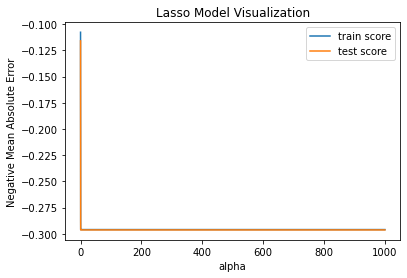

In [96]:
# Plot the mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Lasso Model Visualization")
plt.legend(['train score','test score'], loc='best')
plt.show()

In [97]:
# model fit using optimal alpha using lasso
lasso = Lasso(alpha=best_alpha_lasso['alpha'])
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [98]:
lasso.coef_

array([ 0.10826699,  0.09616153,  0.1283089 ,  0.06749457,  0.07066567,
        0.08767579,  0.07483471,  0.12083489,  0.28567293,  0.19072566,
        0.05664648,  0.14848641,  0.13771573, -0.06954044, -0.19358142,
       -0.17092778,  0.12955538,  0.09023306,  0.08070376,  0.0292446 ,
        0.05877179,  0.04266695, -0.23587329,  0.09846096,  0.        ,
        0.32197777,  0.05976062,  0.        , -0.        ,  0.        ,
        0.18557039,  0.05583824,  0.06225912,  0.08050225,  0.07523935,
        0.1159531 ,  0.08363117,  0.08765181,  0.15807373,  0.21469197,
        0.13984737,  0.0123359 ,  0.12161211, -0.17525404, -0.0734981 ,
        0.06435307,  0.10240694,  0.084182  ,  0.0876701 ,  0.15069969])

In [99]:
# dataframe of all Features and coefficients with lasso

df_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient_lasso':lasso.coef_.round(2)})
df_lasso.reset_index(drop=True, inplace=True)
df_lasso

,Features,Coefficient_lasso
0,OverallQual,0.11
1,BsmtFullBath,0.10
2,FullBath,0.13
3,HalfBath,0.07
4,Fireplaces,0.07
5,GarageCars,0.09
6,SaleCondition,0.07
7,MSZoning_FV,0.12
8,MSZoning_RH,0.29
9,MSZoning_RL,0.19


In [100]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.025844737199965623

### Ridge

In [101]:
# Ridge

ridge = Ridge()
ridge_model_cv = GridSearchCV(estimator=ridge,
                             param_grid=params,
                             scoring='neg_mean_absolute_error',
                             cv=5,
                             return_train_score=True)
ridge_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [102]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003590,7.976772e-04,0.001995,2.431402e-07,0.0001,{'alpha': 0.0001},-0.111670,-0.116286,-0.122073,-0.119742,...,-0.115701,0.004941,14,-0.106770,-0.106037,-0.104708,-0.105822,-0.107232,-0.106114,0.000866
1,0.002992,3.371748e-07,0.001995,2.336015e-07,0.001,{'alpha': 0.001},-0.111676,-0.116281,-0.122067,-0.119741,...,-0.115698,0.004940,13,-0.106772,-0.106040,-0.104710,-0.105825,-0.107233,-0.106116,0.000865
2,0.016756,2.703073e-02,0.001995,2.431402e-07,0.01,{'alpha': 0.01},-0.111743,-0.116237,-0.122007,-0.119733,...,-0.115675,0.004933,12,-0.106794,-0.106072,-0.104740,-0.105855,-0.107247,-0.106142,0.000860
3,0.003591,4.887918e-04,0.001994,3.015783e-07,0.05,{'alpha': 0.05},-0.112110,-0.116057,-0.121769,-0.119696,...,-0.115623,0.004856,10,-0.106913,-0.106273,-0.104910,-0.106015,-0.107340,-0.106290,0.000833
4,0.003591,7.979274e-04,0.001795,3.988266e-04,0.1,{'alpha': 0.1},-0.112551,-0.115861,-0.121532,-0.119641,...,-0.115584,0.004768,8,-0.107043,-0.106506,-0.105097,-0.106213,-0.107500,-0.106472,0.000817


In [103]:
best_alpha_ridge = ridge_model_cv.best_params_
print(best_alpha_ridge['alpha'])

0.5


In [104]:
ridge_model_cv.best_score_

-0.1154113030483851

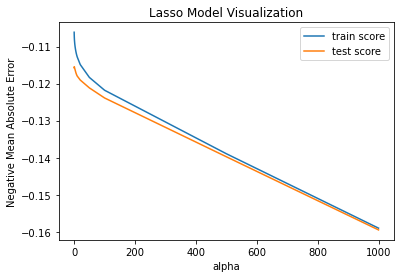

In [105]:
# Plot the mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Lasso Model Visualization")
plt.legend(['train score','test score'], loc='best')
plt.show()

In [106]:
# model fit using optimal alpha using ridge
ridge = Ridge(alpha=best_alpha_ridge['alpha'])
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [107]:
ridge.coef_

array([ 0.10768897,  0.09686353,  0.12864594,  0.06730951,  0.07109238,
        0.08768769,  0.07424638,  0.13144295,  0.29174382,  0.19974805,
        0.06718269,  0.14908674,  0.13992521, -0.07065603, -0.19327433,
       -0.16463677,  0.13140403,  0.09281379,  0.08593585,  0.09987042,
        0.11858441,  0.1333611 , -0.20936014,  0.10350732,  0.04219427,
        0.30031351,  0.07151495,  0.07168951, -0.00862611,  0.04219427,
        0.19591835,  0.06919248,  0.08266829,  0.09349737,  0.08735817,
        0.12856282,  0.09575073,  0.10899185,  0.17792667,  0.22937843,
        0.17012387,  0.05454517,  0.12012604, -0.18125835, -0.09420309,
        0.09107017,  0.1380644 ,  0.10627309,  0.08898653,  0.1578079 ])

In [108]:
# dataframe of all Features and coefficients with Ridge
df_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient_ridge':ridge.coef_.round(2)})
df_ridge.reset_index(drop=True, inplace=True)
df_ridge

,Features,Coefficient_ridge
0,OverallQual,0.11
1,BsmtFullBath,0.10
2,FullBath,0.13
3,HalfBath,0.07
4,Fireplaces,0.07
5,GarageCars,0.09
6,SaleCondition,0.07
7,MSZoning_FV,0.13
8,MSZoning_RH,0.29
9,MSZoning_RL,0.20


In [109]:
# Check the mean squared error
mean_squared_error(y_test, ridge.predict(X_test))

0.025767994677562682

### Plotting the Predicted Price to check how data is distributed

In [110]:
pred_lasso = lasso.predict(X_test)
pred_ridge = ridge.predict(X_test)

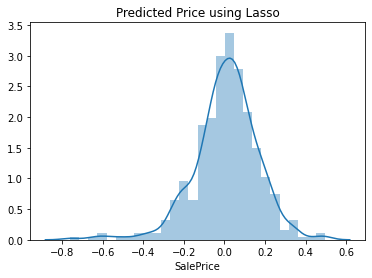

In [111]:
# Lasso
plt.title('Predicted Price using Lasso')
sns.distplot(y_test-pred_lasso)
plt.show()

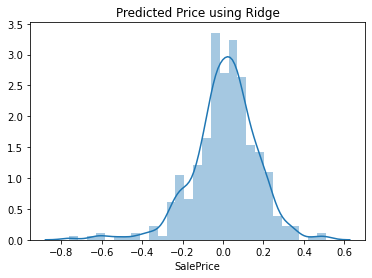

In [112]:
# Ridge
plt.title('Predicted Price using Ridge')
sns.distplot(y_test-pred_ridge)
plt.show()

## Assignment-Part II

**Question 1** <br>

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Answer:**
- Optimal value of alpha : <br>
    - Ridge : 0.5 
    - Lasso : 0.0001

In [113]:
 # double the value of alpha for both ridge and lasso
ridge2 = best_alpha_ridge['alpha']*2
lasso2 = best_alpha_lasso['alpha']*2
print(ridge2,lasso2)

1.0 0.0002


In [114]:
# model fit with ridge2
ridge = Ridge(alpha=ridge2)
ridge.fit(X_train, y_train)

Ridge()

In [115]:
df_ridge.head()

,Features,Coefficient_ridge
0,OverallQual,0.11
1,BsmtFullBath,0.10
2,FullBath,0.13
3,HalfBath,0.07
4,Fireplaces,0.07


In [116]:
# updating dataframe : coefficient_ridge2 is the column having coefficients after aplha has been doubled
df_ridge['Coefficient_ridge2'] = ridge.coef_

In [117]:
df_ridge.head()

,Features,Coefficient_ridge,Coefficient_ridge2
0,OverallQual,0.11,0.109055
1,BsmtFullBath,0.10,0.097320
2,FullBath,0.13,0.128845
3,HalfBath,0.07,0.067195
4,Fireplaces,0.07,0.070926


In [118]:
# predicting after alpha value is doubled using ridge  
pred_ridge = ridge.predict(X_test)

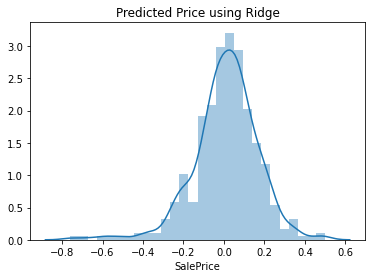

In [119]:
# plotting the predicted data distribution 
plt.title('Predicted Price using Ridge')
sns.distplot(y_test-pred_ridge)
plt.show()

In [120]:
df_ridge.head()

,Features,Coefficient_ridge,Coefficient_ridge2
0,OverallQual,0.11,0.109055
1,BsmtFullBath,0.10,0.097320
2,FullBath,0.13,0.128845
3,HalfBath,0.07,0.067195
4,Fireplaces,0.07,0.070926


In [121]:
# 15 most important predictors after model updation
df_ridge.iloc[(-df_ridge['Coefficient_ridge2'].abs()).argsort()].head(15)

,Features,Coefficient_ridge,Coefficient_ridge2
8,MSZoning_RH,0.29,0.248532
25,Exterior1st_Stone,0.30,0.245371
30,Exterior2nd_CmentBd,0.20,0.179825
14,Neighborhood_MeadowV,-0.19,-0.178617
39,Heating_GasW,0.23,0.175414
9,MSZoning_RL,0.20,0.166813
22,Exterior1st_BrkComm,-0.21,-0.149865
11,Neighborhood_ClearCr,0.15,0.144588
15,Neighborhood_NPkVill,-0.16,-0.142118
38,Heating_GasA,0.18,0.140670


In [122]:
# model fir with lasso2
lasso = Lasso(alpha=lasso2)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [123]:
# predicting after alpha value is doubled using lasso
pred_lasso = lasso.predict(X_test)

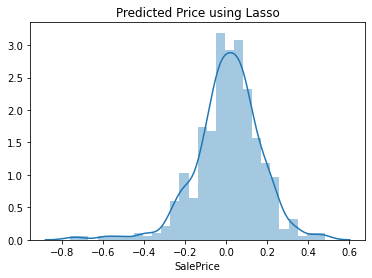

In [124]:
# plotting the predicted data distribution 
plt.title('Predicted Price using Lasso')
sns.distplot(y_test-pred_lasso)
plt.show()

### Checking if model is robust and generalisable

In [141]:
# r2 score of lasso model
r2_score(y_true=y_test,y_pred=pred_lasso)

0.820198475545069

In [149]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

Mean Absolute Error: 0.1191925798805001
Mean Squared Error: 0.02610231148303406
Root Mean Squared Error: 0.1615620979160461


Text(0.5, 0, 'Errors')

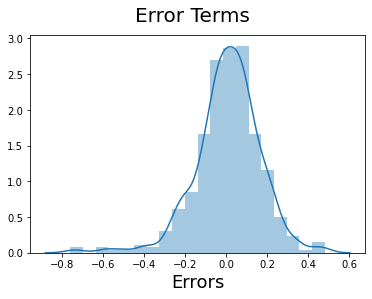

In [143]:
# checking if error terms are normally distributed for test data : Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - pred_lasso), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)                     

**Oservation:**
- Error terms are almost normallt distributed around mean at 0.

Text(0, 0.5, 'pred_lasso')

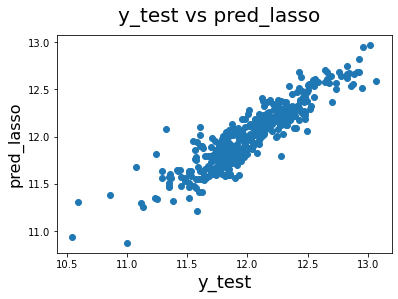

In [146]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,pred_lasso)
fig.suptitle('y_test vs pred_lasso', fontsize=20)           
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('pred_lasso', fontsize=16)

In [125]:
df_lasso.head()

,Features,Coefficient_lasso
0,OverallQual,0.11
1,BsmtFullBath,0.10
2,FullBath,0.13
3,HalfBath,0.07
4,Fireplaces,0.07


In [126]:
# updating dataframe : coefficient_lasso2 is the column having coefficients after aplha has been doubled
df_lasso['Coefficient_lasso2'] = lasso.coef_

In [127]:
df_lasso.head()

,Features,Coefficient_lasso,Coefficient_lasso2
0,OverallQual,0.11,0.111143
1,BsmtFullBath,0.10,0.097405
2,FullBath,0.13,0.127872
3,HalfBath,0.07,0.066625
4,Fireplaces,0.07,0.070664


In [128]:
# 15 most important predictors after model updation
df_lasso.iloc[(-df_lasso['Coefficient_lasso2'].abs()).argsort()].head(15)

,Features,Coefficient_lasso,Coefficient_lasso2
25,Exterior1st_Stone,0.32,0.260039
8,MSZoning_RH,0.29,0.219711
22,Exterior1st_BrkComm,-0.24,-0.187454
14,Neighborhood_MeadowV,-0.19,-0.176664
30,Exterior2nd_CmentBd,0.19,0.161950
15,Neighborhood_NPkVill,-0.17,-0.157170
39,Heating_GasW,0.21,0.143337
11,Neighborhood_ClearCr,0.15,0.142771
12,Neighborhood_Crawfor,0.14,0.136588
9,MSZoning_RL,0.19,0.135077


**Question 3** <br>

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [129]:
df_lasso.head()

,Features,Coefficient_lasso,Coefficient_lasso2
0,OverallQual,0.11,0.111143
1,BsmtFullBath,0.10,0.097405
2,FullBath,0.13,0.127872
3,HalfBath,0.07,0.066625
4,Fireplaces,0.07,0.070664


In [130]:
# 5 most important predictors 
df_lasso.iloc[(-df_lasso['Coefficient_lasso'].abs()).argsort()].head(5)

,Features,Coefficient_lasso,Coefficient_lasso2
25,Exterior1st_Stone,0.32,0.260039
8,MSZoning_RH,0.29,0.219711
22,Exterior1st_BrkComm,-0.24,-0.187454
39,Heating_GasW,0.21,0.143337
14,Neighborhood_MeadowV,-0.19,-0.176664


In [131]:
delete_list = ['Exterior1st_Stone','MSZoning_RH','Exterior1st_BrkComm','Heating_GasW','Neighborhood_MeadowV']

In [132]:
X_train.head()

,OverallQual,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageCars,SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Heating_OthW,Heating_Wall,CentralAir_Y,Functional_Sev,MiscFeature_Othr,SaleType_CWD,SaleType_Con,SaleType_ConLI,SaleType_New,SaleType_Oth
953,5,0,2,1,1,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1180,7,0,2,1,0,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
567,7,0,2,0,0,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1041,6,0,1,1,0,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
518,6,1,2,1,0,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [135]:
X_train.shape

(970, 50)

In [133]:
X_train_del = X_train.drop(delete_list,axis=1)

In [134]:
X_train_del.head()

,OverallQual,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageCars,SaleCondition,MSZoning_FV,MSZoning_RL,MSZoning_RM,...,Heating_OthW,Heating_Wall,CentralAir_Y,Functional_Sev,MiscFeature_Othr,SaleType_CWD,SaleType_Con,SaleType_ConLI,SaleType_New,SaleType_Oth
953,5,0,2,1,1,2,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1180,7,0,2,1,0,2,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
567,7,0,2,0,0,2,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1041,6,0,1,1,0,2,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
518,6,1,2,1,0,2,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [136]:
# fitting the model after deleting the top 5 variables
lasso = Lasso(alpha=best_alpha_lasso['alpha'])
lasso.fit(X_train_del, y_train)

Lasso(alpha=0.0001)

In [138]:
# dataframe of all Features and coefficients with lasso after deleting top 5 variables

df_lasso5 = pd.DataFrame({'Features':X_train_del.columns, 'Coefficient_lasso':lasso.coef_.round(2)})
df_lasso5.reset_index(drop=True, inplace=True)
df_lasso5

,Features,Coefficient_lasso
0,OverallQual,0.11
1,BsmtFullBath,0.10
2,FullBath,0.13
3,HalfBath,0.06
4,Fireplaces,0.07
5,GarageCars,0.09
6,SaleCondition,0.07
7,MSZoning_FV,-0.03
8,MSZoning_RL,0.04
9,MSZoning_RM,-0.11


In [140]:
# 15 most important predictors after model updation
df_lasso5.iloc[(-df_lasso5['Coefficient_lasso'].abs()).argsort()].head(5)

,Features,Coefficient_lasso
38,Functional_Sev,-0.18
44,SaleType_Oth,0.15
11,Neighborhood_Crawfor,0.15
10,Neighborhood_ClearCr,0.15
13,Neighborhood_NPkVill,-0.14
